In [56]:
from spectrogram import Spectrogram

import matplotlib.pyplot as plt
import numpy as np


In [11]:
spec = Spectrogram("./dig/GEN3CH_4_009.dig")

In [324]:
times, velocities, intensities = spec.slice((spec.time[1800],spec.time[2000]),(1000,4000))


In [22]:
# spec.plot(max_vel=5000, max_time = 50)

In [35]:
    def plot(time,velocities,intensities, axes=None, **kwargs):
        # max_vel=6000, vmin=-200, vmax=100):
        if axes == None:
            axes = plt.gca()
        if 'max_vel' in kwargs:
            axes.set_ylim(top=kwargs['max_vel'])
            del kwargs['max_vel']
        axes.set_xlim(right=50)
        pcm = axes.pcolormesh(
            time ,
            velocities,
            intensities,
            **kwargs)
            
        plt.gcf().colorbar(pcm, ax=axes)
        axes.set_ylabel('Velocity (m/s)')
        axes.set_xlabel('Time ($\mu$s)')

        return pcm

In [325]:
velocities.size

636

In [326]:
intensities.size

127000

In [227]:
intensities[1]

array([ 10.46856473,   6.65274395,   3.4696957 , -10.40317384,
         5.26194401,  -5.70248642, -11.05535377,  11.22802065,
        25.72121605,   2.56569648,  57.21464218,  23.20657998,
         3.8556512 , -31.07707803,  -0.98403547,   5.51282821,
        -3.12911522,  -9.93806092,  40.90388278,  -9.64274176,
        -0.31212838, -13.56054256, -48.79460088, -10.44956787,
       -12.06405978,  -3.43721016,  -3.90427682,  -4.28080828,
       -14.17293234, -23.96773541,  13.93321051,  -0.2815027 ,
         2.99983694,  12.45058948,   8.21015031, -11.63767662,
       -15.09352759, -22.93085649,  -3.88855659,   6.86219344,
        -1.45730929, -26.55597981,  -5.70427508,  -4.88656573,
       -45.74010336, -21.40726973,  -3.5089311 ,  -0.54184153,
        -5.63143375, -17.89758009])

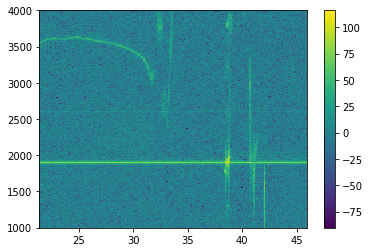

In [327]:
plt.pcolormesh(times*1e6,velocities,intensities)
plt.colorbar()

In [328]:
def detectCrossings(ins):
    #intensities is of the form [velocities][times]
    intersections = np.empty((intensities.shape[0]-1,intensities.shape[1]-1),dtype=object)
    #iterate through each velocity step
    for i in range(intensities.shape[0]-1):
            #iterate through each time within that velocity
            for j in range(intensities.shape[1]-1):
                #we want the minimum change between two dominoes,one horizontal and one vertical
                #we also want to know that the change within that domino is minimal
                #So, we get the average of each domino, and then the abs change between them
                
                #Also multiplied the by the total intensity, since we want to prefer a spot that is generally bright
                intersections[i,j] = abs(abs(ins[i][j]-ins[i+1][j])-abs(ins[i][j]-ins[i][j+1]))*ins[i][j],[i,j]
    return intersections


In [341]:
r =detectCrossings(intensities)
# r= r[1]
r = r.flatten()
r = np.sort(r,axis=0)
z = [item[1] for item in r[0:5]]
# VI = velocities[0]
# TI = times[0]
z = [[times[item[1]]*1e6,velocities[item[0]]] for item in z]

z



[[29.00736, 1745.452880859375],
 [42.40127999999998, 2814.483642578125],
 [41.90975999999999, 1594.085693359375],
 [29.990400000000005, 3907.16552734375],
 [33.30816, 3784.1796875]]

<function matplotlib.pyplot.show(*args, **kw)>

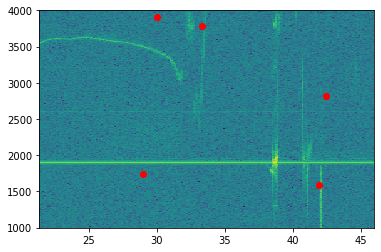

In [342]:
plt.pcolormesh(times*1e6,velocities,intensities)
plt.scatter(*zip(*z),color='red')
plt.show

In [193]:
times[0]*1e6

39.820799999999984